In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams["figure.constrained_layout.use"] = True
sns.set_theme(rc={"figure.dpi": 80})

from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
tips = sns.load_dataset("tips")
diamonds = sns.load_dataset("diamonds")
taxis = sns.load_dataset("taxis")
mpg = sns.load_dataset("mpg")
flights = sns.load_dataset("flights")
flights_wide = flights.pivot(index="month", columns="year", values="passengers")

# tips.info
# diamonds.info


## <center>Options for bin parameterization</center>


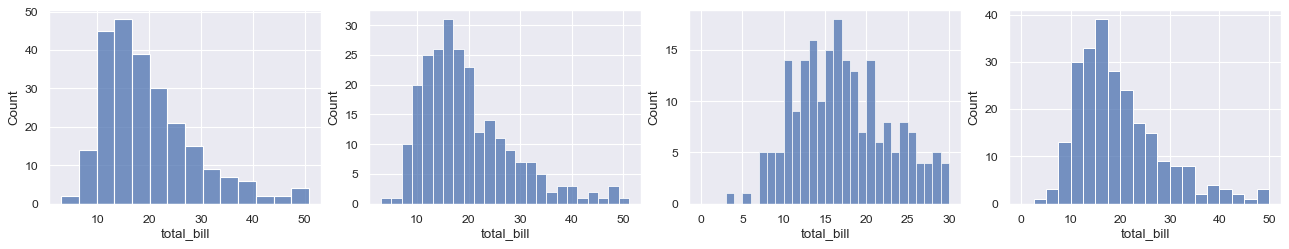

In [3]:
bin_params = [
    # bins, binwidth, binrange
    ("auto", None, None),
    (None, 2, None),
    (None, 1, (0, 30)),
    (20, None, (0, 50)),
]

n_col = len(bin_params)

f, axs = plt.subplots(1, n_col, figsize=(4 * n_col, 3))
for ax, params in zip(axs, bin_params):
    bins, binwidth, binrange = params
    sns.histplot(
        data=tips,
        x="total_bill",
        bins=bins,
        binwidth=binwidth,
        binrange=binrange,
        ax=ax,
    )


## <center>Options for Resolving multiple hue semantic levels</center>


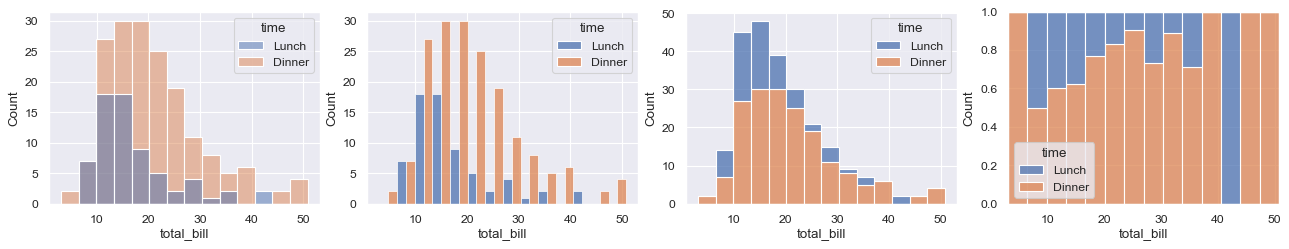

In [4]:
methods = "layer", "dodge", "stack", "fill"
n_col = len(methods)
f, axs = plt.subplots(1, n_col, figsize=(4 * n_col, 3))
for method, ax in zip(methods, axs):
    sns.histplot(data=tips, x="total_bill", hue="time", multiple=method, ax=ax)


## <center>Simple parameterization of appearance</center>


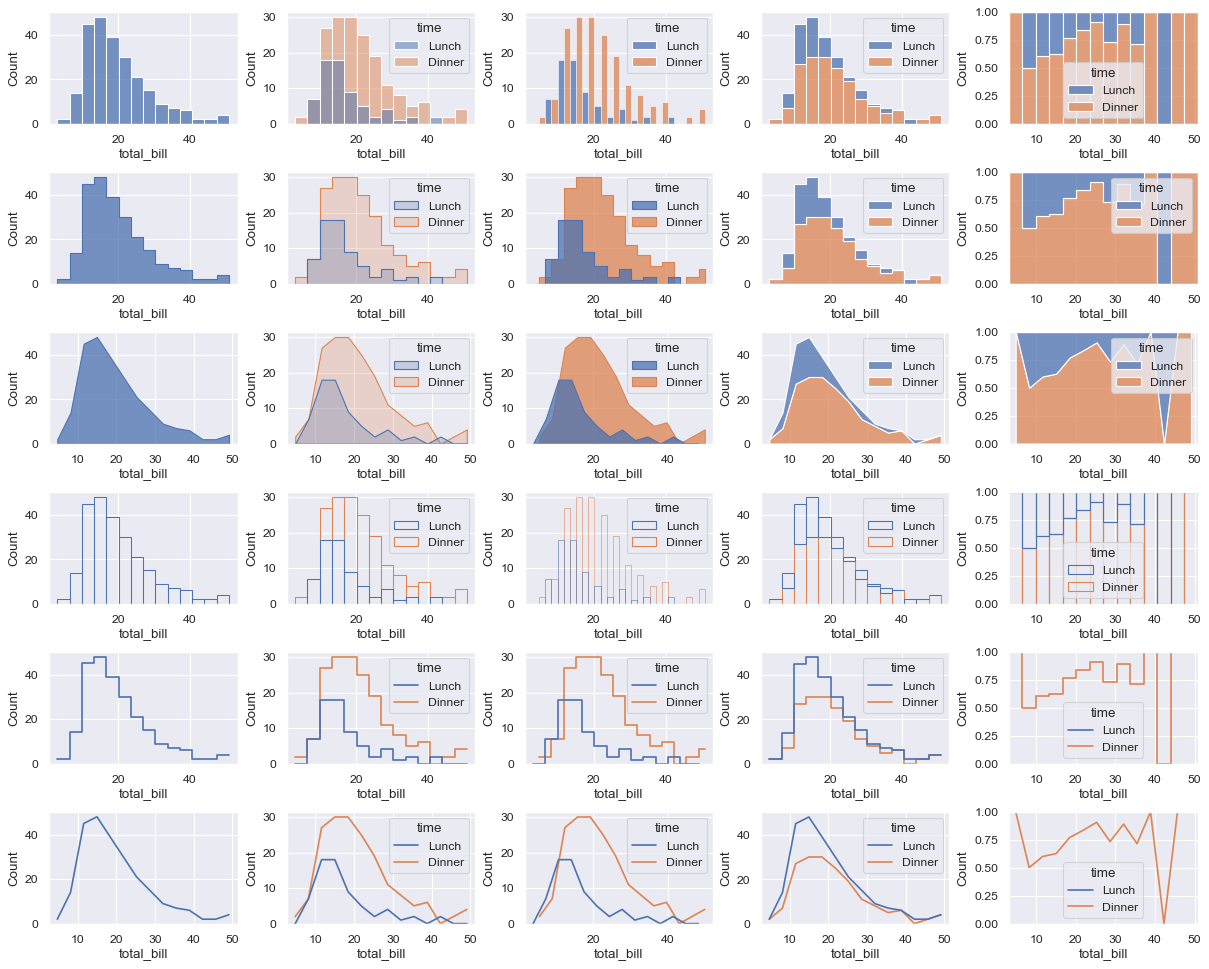

In [5]:
hues = None, "time", "time", "time", "time"
methods = "layer", "layer", "dodge", "stack", "fill"
elements = "bars", "step", "poly", "bars", "step", "poly"
fills = True, True, True, False, False, False

ncol = len(hues)
nrow = len(elements)

f, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol * 3, nrow * 2))

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        sns.histplot(
            data=tips,
            x="total_bill",
            hue=hues[j],
            multiple=methods[j],
            element=elements[i],
            fill=fills[i],
            ax=ax,
        )


## <center>Options for normalized bin static</center>


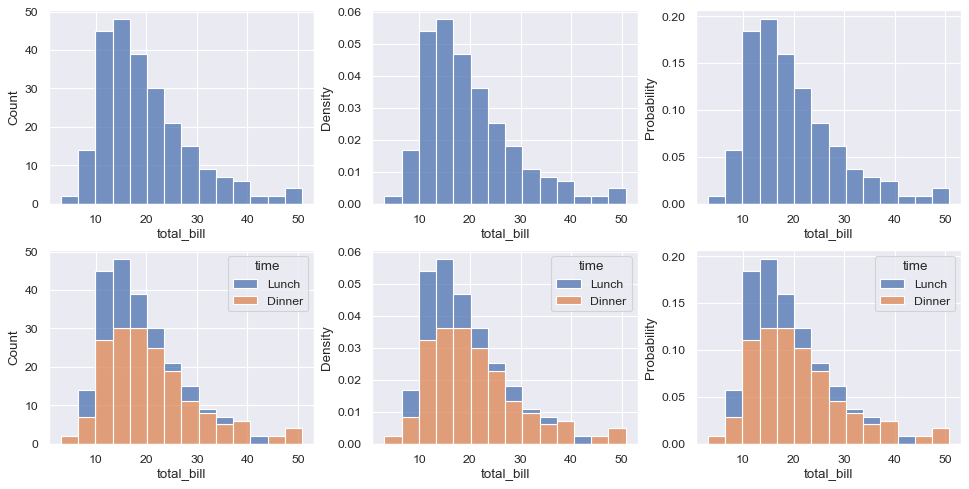

In [6]:
stats = "count", "density", "probability"
ncol = len(stats)
f, axs = plt.subplots(2, ncol, figsize=(4 * ncol, 6))
for stat, ax_col in zip(stats, axs.T):
    sns.histplot(tips, x="total_bill", stat=stat, ax=ax_col[0])
    sns.histplot(
        tips, x="total_bill", hue="time", multiple="stack", stat=stat, ax=ax_col[1]
    )


## <center>KDE smoothing on count or probability histograms</center>


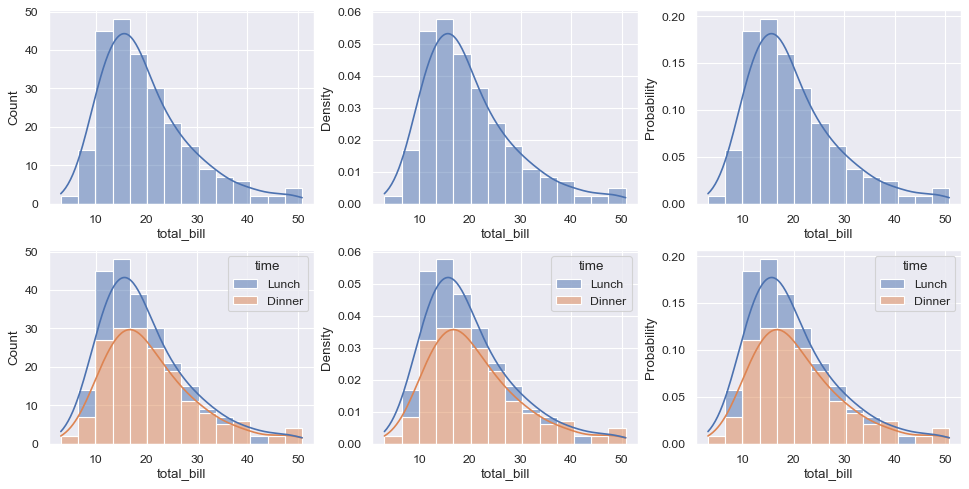

In [7]:
stats = "count", "density", "probability"
ncol = len(stats)
f, axs = plt.subplots(2, ncol, figsize=(4 * ncol, 6))
for stat, ax_col in zip(stats, axs.T):
    sns.histplot(tips, x="total_bill", stat=stat, kde=True, ax=ax_col[0])
    sns.histplot(
        tips,
        x="total_bill",
        hue="time",
        multiple="stack",
        stat=stat,
        kde=True,
        ax=ax_col[1],
    )


## <center>Centered, integer bins for discrete distributions</center>


<Axes: ylabel='Count'>

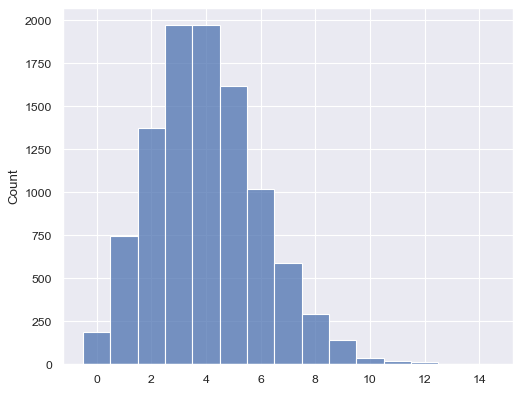

In [8]:
x = np.random.poisson(4, 10_000)
sns.histplot(x, discrete=True)


## <center>Support for Categorical or Datetime data</center>


<Axes: xlabel='day', ylabel='Count'>

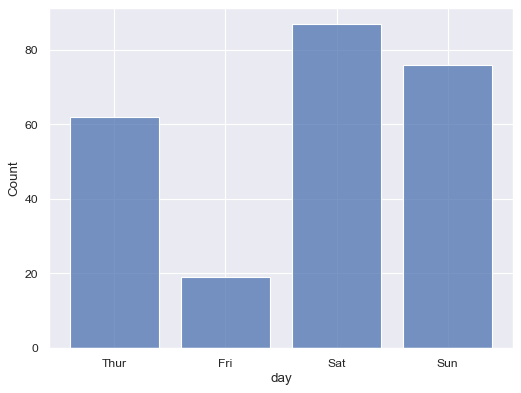

In [9]:
sns.histplot(tips, x="day", discrete=True, shrink=0.8)

<Axes: ylabel='Count'>

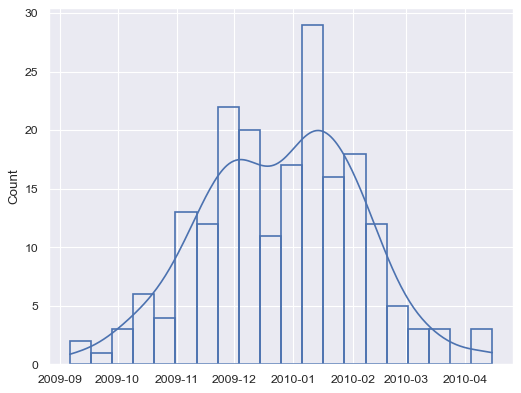

In [10]:
dates = np.arange("2000", "2020", dtype="datetime64[D]")
data = dates[np.random.binomial(20 * 365, 0.5, 200)]
sns.histplot(data, bins=20, kde=True, fill=False)


## <center>Log-space binning</center>


<Axes: xlabel='price', ylabel='Count'>

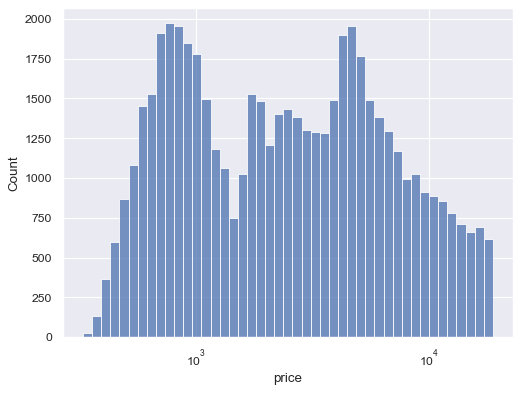

In [11]:
sns.histplot(diamonds["price"], log_scale=True)

## <center>Adaptive line widths</center>


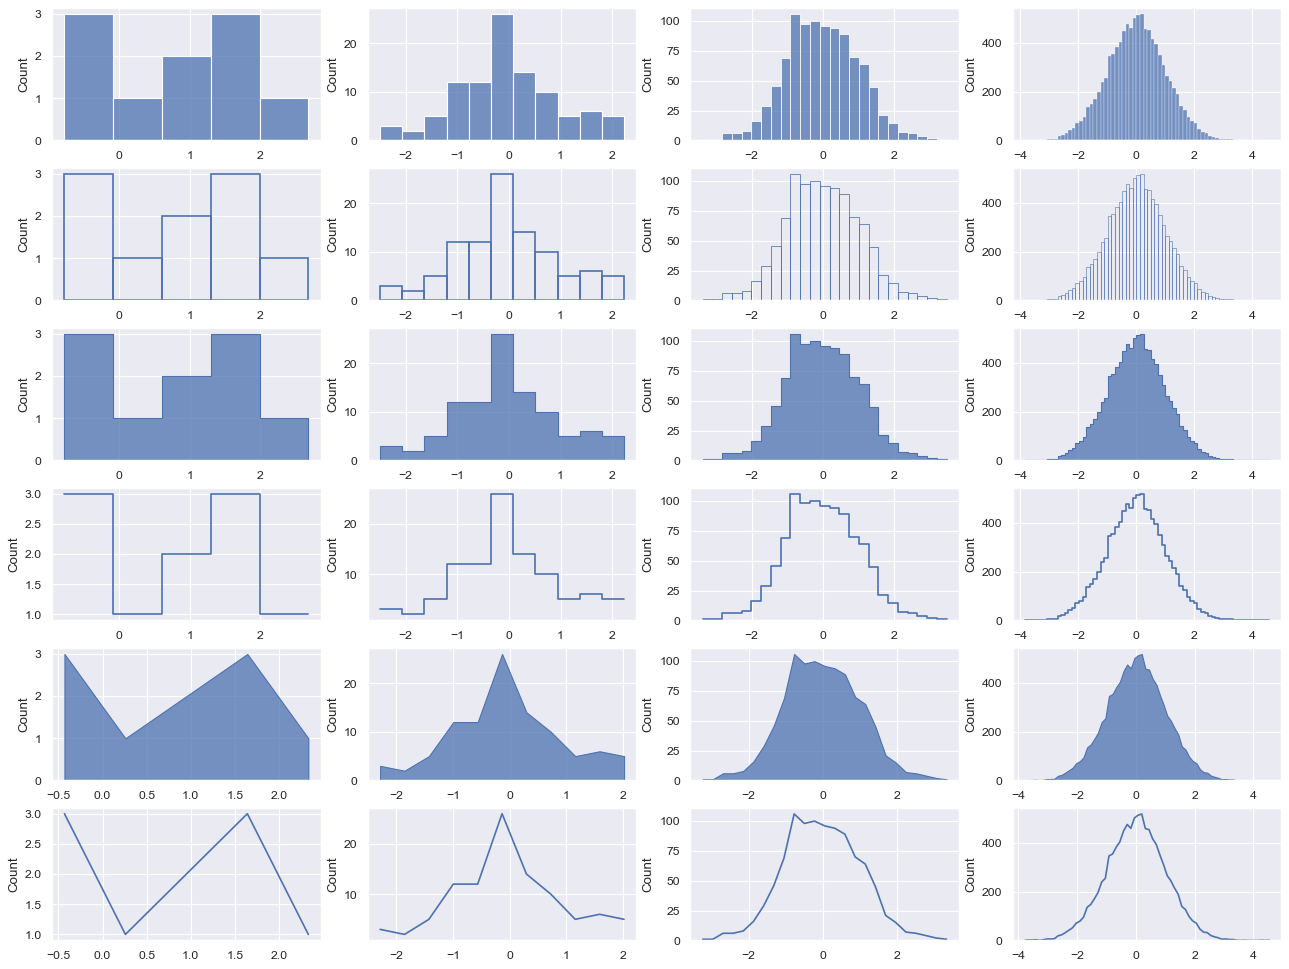

In [12]:
elements = "bars", "step", "poly"
fills = True, False

nrow = len(elements) * len(fills)
ncol = 4

f, axs = plt.subplots(nrow, ncol, figsize=(ncol * 4, nrow * 2))
for j, ax_col in enumerate(axs.T, 1):
    x = np.random.normal(0, 1, 10**j)
    for i, ax in enumerate(ax_col):
        sns.histplot(x=x, element=elements[i // 2], fill=fills[i % 2], ax=ax)


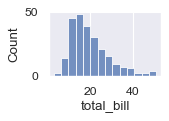

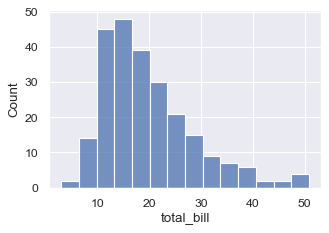

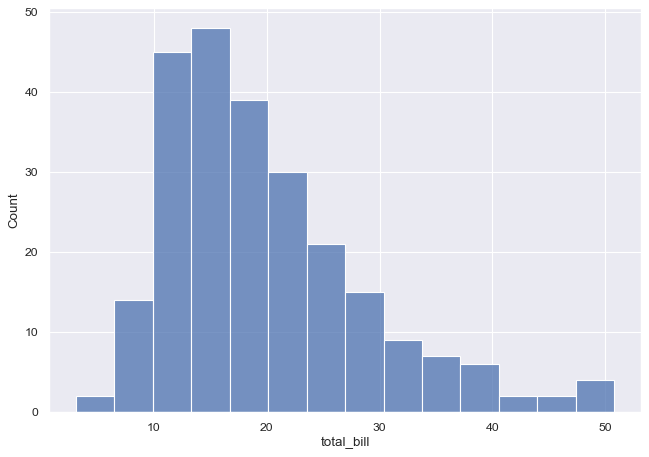

In [13]:
for w in [2, 4, 8]:
    f, ax = plt.subplots(figsize=(w, 0.7 * w))
    sns.histplot(tips, x="total_bill")


# <center>Treatment of Vector data with no explicit assignments using flights data</center>

In [14]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [15]:
flights_wide.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 12 entries, Jan to Dec
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1949    12 non-null     int64
 1   1950    12 non-null     int64
 2   1951    12 non-null     int64
 3   1952    12 non-null     int64
 4   1953    12 non-null     int64
 5   1954    12 non-null     int64
 6   1955    12 non-null     int64
 7   1956    12 non-null     int64
 8   1957    12 non-null     int64
 9   1958    12 non-null     int64
 10  1959    12 non-null     int64
 11  1960    12 non-null     int64
dtypes: int64(12)
memory usage: 1.5 KB


In [17]:
flights_wide[1955].info()

<class 'pandas.core.series.Series'>
CategoricalIndex: 12 entries, Jan to Dec
Series name: 1955
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 504.0 bytes


In [18]:
flights_wide[[1955]].info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 12 entries, Jan to Dec
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1955    12 non-null     int64
dtypes: int64(1)
memory usage: 504.0 bytes


<Axes: xlabel='year', ylabel='passengers'>

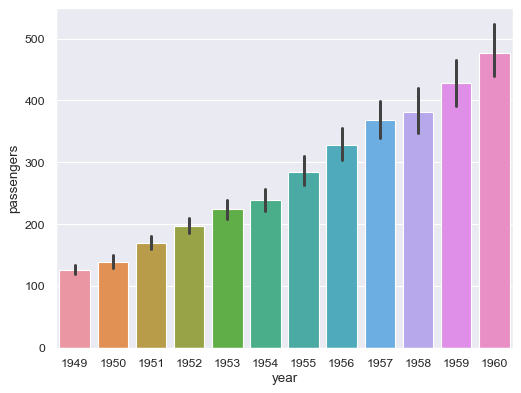

In [27]:
sns.barplot(flights, x="year", y = "passengers")

<Axes: xlabel='year'>

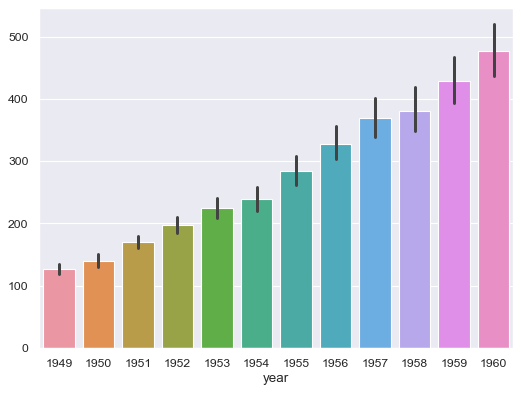

In [28]:
sns.barplot(flights_wide)

<Axes: >

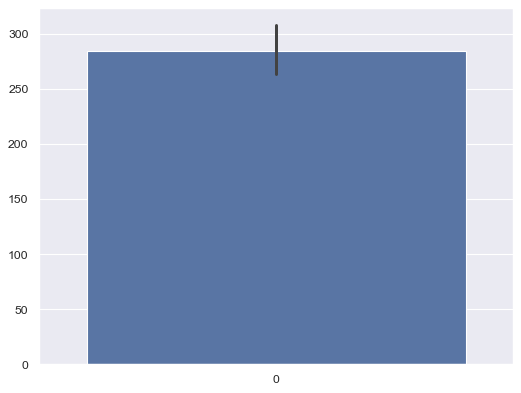

In [29]:
sns.barplot(flights_wide[1955].to_numpy())

<Axes: xlabel='color', ylabel='price'>

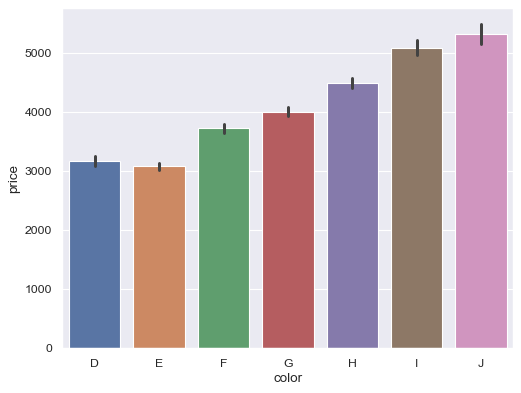

In [30]:
sns.barplot(diamonds, x = "color", y = "price")

<Axes: xlabel='color', ylabel='price'>

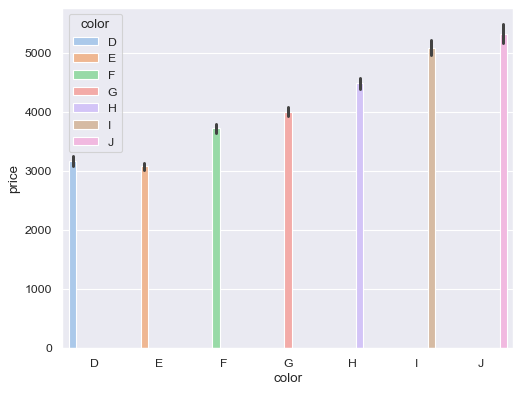

In [32]:
sns.barplot(diamonds, x = "color", y = "price", hue = "color", palette="pastel")

In [34]:
sns.barplot(tips, x="day", y="Total_bill", hue=tips["day"].isin(["Sat", "Sun"]).rename("weekend"))

ValueError: Could not interpret input 'Total_bill'